In [1]:
import os
import pandas as pd
from geopy.geocoders import Nominatim
from fuzzywuzzy import fuzz
import pandas as pd
from nltk import word_tokenize, pos_tag
from geopy.geocoders import GoogleV3
from geopy.exc import GeocoderTimedOut, GeocoderQuotaExceeded
import time
import re
from geopy.geocoders import GoogleV3
import time
import requests
from fuzzywuzzy import process
import folium
from folium.plugins import HeatMap
import csv

/Users/gayathri/myenv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/gayathri/myenv/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
output_folder = '/Users/gayathri/Documents/nj-local-news-analysis/Gpe_with_Quadrants/'

In [17]:
import folium
from folium.plugins import HeatMap
import pandas as pd

def create_heatmap(csv_data, file):
    max_occurrences_row = csv_data[csv_data['gpe_sum'] == csv_data['gpe_sum'].max()].iloc[0]
    highest_occurrences_latitude = max_occurrences_row['gpe_latitude']
    highest_occurrences_longitude = max_occurrences_row['gpe_longitude']
    highest_occurrence = [highest_occurrences_latitude, highest_occurrences_longitude]
    print(highest_occurrence)
    highest_gpe = max_occurrences_row['gpe_new']
    print(highest_gpe)

    # Add a new column 'Quadrant' based on 'gpe_sum' percentiles
    csv_data['Quadrant'] = pd.cut(csv_data['gpe_sum'], bins=[0, 0.25, 0.5, 0.75, 1], labels=['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4'], include_lowest=True)

    heatmap_map = folium.Map(location=highest_occurrence, zoom_start=10, tiles='OpenStreetMap', max_zoom=5)

    # Iterate over each quadrant to generate the heatmap
    for quadrant, gradient_color in zip(['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4'], ['blue', 'green', 'orange', 'red']):
        heat_data = list(zip(csv_data[csv_data['Quadrant'] == quadrant]['gpe_latitude'],
                             csv_data[csv_data['Quadrant'] == quadrant]['gpe_longitude'],
                             csv_data[csv_data['Quadrant'] == quadrant]['gpe_sum']))
        HeatMap(heat_data, gradient={1: gradient_color}, opacity=0.7, min_opacity=0.5, radius=15, blur=20).add_to(heatmap_map)

    disable_interactivity_js = """
    function disableInteractivity() {
        var map = document.getElementById('map');
        map.style['pointer-events'] = 'none';
    }
    disableInteractivity();
    """

    folium.Element(disable_interactivity_js).add_to(heatmap_map)

    legend_html = """
    <div style="position: fixed; 
                bottom: 50px; left: 20px; width: 180px; 
                background-color: rgba(255, 255, 255, 0.8); border-radius: 5px; z-index: 1000;">
        <div style="text-align: center; padding: 10px; font-size: 14px; font-weight: bold;">Relative frequency of location count legend (0 to 1 Scale)</div>
        <div style="padding: 10px; font-size: 12px;">
            <div style="background-color: blue; width: 20px; height: 20px; display: inline-block; vertical-align: middle;"></div>
            <span style="vertical-align: middle;">0 - 0.25: Blue</span>
        </div>
        <div style="padding: 10px; font-size: 12px;">
            <div style="background-color: green; width: 20px; height: 20px; display: inline-block; vertical-align: middle;"></div>
            <span style="vertical-align: middle;">0.25 - 0.5: Green</span>
        </div>
        <div style="padding: 10px; font-size: 12px;">
            <div style="background-color: orange; width: 20px; height: 20px; display: inline-block; vertical-align: middle;"></div>
            <span style="vertical-align: middle;">0.5 - 0.75: Orange</span>
        </div>
        <div style="padding: 10px; font-size: 12px;">
            <div style="background-color: red; width: 20px; height: 20px; display: inline-block; vertical-align: middle;"></div>
            <span style="vertical-align: middle;">0.75 - 1: Red</span>
        </div>
    </div>
    """
    save_file = "heatmap_" + file

    # Sort the dataset based on the 'Quadrant' column
    csv_data.sort_values(by=['Quadrant'], inplace=True)

    heatmap_map.get_root().html.add_child(folium.Element(legend_html))
    csv_data.to_csv(output_folder + save_file + '_sorted.csv', index=False)  # Save the sorted CSV
    heatmap_map.save(output_folder + save_file + '.html')
    print("Heatmap will be saved to:", output_folder + save_file + '.html')

    return heatmap_map

In [20]:
file = '6abc'
csv_data = pd.read_csv('/Users/gayathri/Library/CloudStorage/Box-Box/Local News Data/No_Duplicates_Data/no_duplicates_6abc.csv')
# df = create_heatmap(csv_data, '6abc.csv')

In [22]:
import pandas as pd
import folium
from folium.plugins import HeatMap
# Assuming csv_data is your DataFrame

# Calculate the percentiles for 'gpe_sum'
percentiles = csv_data['gpe_sum'].quantile([0.25, 0.5, 0.75]).tolist()

# Define bins with 0 as the start, percentiles as intermediate values, and the maximum value plus a small epsilon as the end
bins = [0] + percentiles + [csv_data['gpe_sum'].max() + 0.01]

# Assign quadrants using these bins
csv_data['Quadrant'] = pd.cut(csv_data['gpe_sum'], bins=bins, labels=['Quadrant 1', 'Quadrant 2', 'Quadrant 3', 'Quadrant 4'], include_lowest=True)

# Sort the dataset based on the 'Quadrant' column
csv_data.sort_values(by=['Quadrant'], inplace=True)

# Save the modified DataFrame to a CSV file
csv_data.to_csv('6abc_quadrant.csv', index=False)

# Display the modified DataFrame if needed
print(csv_data.head())

                                               news_url    outlet  \
478   https://6abc.com/shopping/whats-the-deal-just-...  6abc.com   
221   https://6abc.com/weather/when-spring-comes-too...  6abc.com   
224   https://6abc.com/texas-man-robbed-bank-to-pay-...  6abc.com   
1253  https://6abc.com/800000-californians-may-have-...  6abc.com   
226   https://6abc.com/weather/berks-county-not-spar...  6abc.com   

      outlet_latitude  outlet_longitude           gpe  gpe_latitude  \
478         41.128848        -74.686881          Oaks     36.166198   
221         41.128848        -74.686881  Pine Barrens     30.777411   
224         41.128848        -74.686881      Groveton     31.055360   
1253        41.128848        -74.686881      Humboldt     41.593146   
226         41.128848        -74.686881        Temple     31.098234   

      gpe_longitude       gpe_county  gpe_occurrences  group_ID       gpe_new  \
478      -94.854675  Delaware County                1       488          Oaks

In [4]:
csv_data = pd.read_csv('/Users/gayathri/Documents/nj-local-news-analysis/aust_data/6abc_quadrant.csv')

In [5]:
import folium
from folium.plugins import HeatMap

# Assuming csv_data is your DataFrame containing the necessary columns (gpe, gpe_latitude, gpe_longitude, gpe_sum, quadrant)
# Replace 'your_file.csv' with the actual path to your CSV file or use your DataFrame directly.
# csv_data = pd.read_csv('your_file.csv')


max_occurrences_row = csv_data.loc[csv_data['gpe_sum'].idxmax()]
highest_occurrences_latitude = max_occurrences_row['gpe_latitude']
highest_occurrences_longitude = max_occurrences_row['gpe_longitude']
highest_occurrence = [highest_occurrences_latitude, highest_occurrences_longitude]

# Create a map centered at the specific location with the desired zoom level and tiles
heatmap_map = folium.Map(location=highest_occurrence, zoom_start=10, tiles='OpenStreetMap')

# Define colors for each quadrant
quadrant_colors = {'Quadrant 1': 'blue', 'Quadrant 2': 'green', 'Quadrant 3': 'orange', 'Quadrant 4': 'red'}

# Iterate over each quadrant to generate the heatmap
for quadrant, color in quadrant_colors.items():
    heat_data = csv_data[csv_data['Quadrant'] == quadrant][['gpe_latitude', 'gpe_longitude', 'gpe_sum']].values.tolist()
    HeatMap(heat_data, gradient={0.1: 'white', 0.5: color}, opacity=0.7, min_opacity=0.5, radius=15, blur=20).add_to(heatmap_map)

# JavaScript to disable zooming and panning
disable_interactivity_js = """
<script>
function disableInteractivity() {
    var map = document.getElementsByClassName('leaflet-container')[0];
    map.style.pointerEvents = 'none';
}
disableInteractivity();
</script>
"""

# Add the JavaScript to the map's HTML
folium.Html(disable_interactivity_js, script=True).add_to(heatmap_map)

# Create a custom legend using HTML and CSS
legend_html = """
<div style="position: fixed; 
            bottom: 50px; left: 20px; width: 180px; 
            background-color: rgba(255, 255, 255, 0.8); border-radius: 5px; z-index: 1000;">
    <div style="text-align: center; padding: 10px; font-size: 14px; font-weight: bold;">Relative frequency of location count legend (0 to 1 Scale)</div>
    <div style="padding: 10px; font-size: 12px;">
        <div style="background-color: blue; width: 20px; height: 20px; display: inline-block; vertical-align: middle;"></div>
        <span style="vertical-align: middle;">0 - 0.25</span>
    </div>
    <div style="padding: 10px; font-size: 12px;">
        <div style="background-color: green; width: 20px; height: 20px; display: inline-block; vertical-align: middle;"></div>
        <span style="vertical-align: middle;">0.25 - 0.5</span>
    </div>
    <div style="padding: 10px; font-size: 12px;">
        <div style="background-color: orange; width: 20px; height: 20px; display: inline-block; vertical-align: middle;"></div>
        <span style="vertical-align: middle;">0.5 - 0.75</span>
    </div>
    <div style="padding: 10px; font-size: 12px;">
        <div style="background-color: red; width: 20px; height: 20px; display: inline-block; vertical-align: middle;"></div>
        <span style="vertical-align: middle;">0.65 - 1</span>
    </div>
</div>
"""

heatmap_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map
save_file = "heatmap_quadrant_legend.html"
heatmap_map.save(save_file)
print("Heatmap will be saved to:", save_file)


Heatmap will be saved to: heatmap_quadrant_legend.html


In [7]:
import folium
from folium.plugins import HeatMap

# Assuming csv_data is your DataFrame containing the necessary columns (gpe, gpe_latitude, gpe_longitude, gpe_sum, quadrant)
# Replace 'your_file.csv' with the actual path to your CSV file or use your DataFrame directly.
# csv_data = pd.read_csv('your_file.csv')


max_occurrences_row = csv_data.loc[csv_data['gpe_sum'].idxmax()]
highest_occurrences_latitude = max_occurrences_row['gpe_latitude']
highest_occurrences_longitude = max_occurrences_row['gpe_longitude']
highest_occurrence = [highest_occurrences_latitude, highest_occurrences_longitude]

# Create a map centered at the specific location with the desired zoom level and tiles
heatmap_map = folium.Map(location=highest_occurrence, zoom_start=10, tiles='OpenStreetMap',min_zoom=2)

# Define colors for each quadrant
quadrant_colors = {'Quadrant 1': 'blue', 'Quadrant 2': 'green', 'Quadrant 3': 'orange', 'Quadrant 4': 'red'}

# Iterate over each quadrant to generate the heatmap
for quadrant, color in quadrant_colors.items():
    heat_data = csv_data[csv_data['Quadrant'] == quadrant][['gpe_latitude', 'gpe_longitude', 'gpe_sum']].values.tolist()
    HeatMap(heat_data, gradient={0.1: 'white', 0.5: color}, opacity=0.7, min_opacity=0.5, radius=15, blur=20).add_to(heatmap_map)

# JavaScript to disable zooming and panning
disable_interactivity_js = """
<script>
function disableInteractivity() {
    var map = document.getElementsByClassName('leaflet-container')[0];
    map.style.pointerEvents = 'none';
}
disableInteractivity();
</script>
"""

# Add the JavaScript to the map's HTML
folium.Html(disable_interactivity_js, script=True).add_to(heatmap_map)

# Create a custom legend using HTML and CSS
legend_html = """
<div style="position: fixed; 
            bottom: 50px; left: 20px; width: 180px; 
            background-color: rgba(255, 255, 255, 0.8); border-radius: 5px; z-index: 1000;
            display: flex; flex-direction: column; align-items: center;">
    <div style="text-align: center; padding: 10px; font-size: 14px; font-weight: bold;">Relative Frequency [ 0 = min; 1 = max]</div>
    <div style="display: flex; align-items: center; justify-content: center; padding: 5px;">
        <div style="background-color: blue; width: 20px; height: 20px; margin-right: 5px;"></div>
            <span>0.0 - 0.25</span>
        </div>
        <div style="display: flex; align-items: center; justify-content: center; padding: 5px;">
        <div style="background-color: green; width: 20px; height: 20px; margin-right: 5px;"></div>
            <span>0.25 - 0.5</span>
        </div>
        <div style="display: flex; align-items: center; justify-content: center; padding: 5px;">
            <div style="background-color: orange; width: 20px; height: 20px; margin-right: 5px;"></div>
        <span>0.5 - 0.75</span>
</div>
<div style="display: flex; align-items: center; justify-content: center; padding: 5px;">
    <div style="background-color: red; width: 20px; height: 20px;"></div>
    <span>0.75 - 1.0</span>
</div>

</div>
    
"""

heatmap_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map
save_file = "heatmap_quadrant_legend.html"
heatmap_map.save(save_file)
print("Heatmap will be saved to:", save_file)


Heatmap will be saved to: heatmap_quadrant_legend.html


In [9]:
import folium
from folium.plugins import HeatMap

# Assuming csv_data is your DataFrame containing the necessary columns (gpe, gpe_latitude, gpe_longitude, gpe_sum, quadrant)
# Replace 'your_file.csv' with the actual path to your CSV file or use your DataFrame directly.
# csv_data = pd.read_csv('your_file.csv')


max_occurrences_row = csv_data.loc[csv_data['gpe_sum'].idxmax()]
highest_occurrences_latitude = max_occurrences_row['gpe_latitude']
highest_occurrences_longitude = max_occurrences_row['gpe_longitude']
highest_occurrence = [highest_occurrences_latitude, highest_occurrences_longitude]

# Create a map centered at the specific location with the desired zoom level and tiles
heatmap_map = folium.Map(location=highest_occurrence, zoom_start=10, tiles='OpenStreetMap',min_zoom=2)

# Define colors for each quadrant
quadrant_colors = {'Quadrant 1': 'blue', 'Quadrant 2': 'green', 'Quadrant 3': 'orange', 'Quadrant 4': 'red'}

# Iterate over each quadrant to generate the heatmap
for quadrant, color in quadrant_colors.items():
    heat_data = csv_data[csv_data['Quadrant'] == quadrant][['gpe_latitude', 'gpe_longitude', 'gpe_sum']].values.tolist()
    HeatMap(heat_data, gradient={0.1: 'white', 0.5: color}, opacity=0.7, min_opacity=0.5, radius=15, blur=20).add_to(heatmap_map)

# JavaScript to disable zooming and panning
disable_interactivity_js = """
<script>
function disableInteractivity() {
    var map = document.getElementsByClassName('leaflet-container')[0];
    map.style.pointerEvents = 'none';
}
disableInteractivity();
</script>
"""

# Add the JavaScript to the map's HTML
folium.Html(disable_interactivity_js, script=True).add_to(heatmap_map)

# Create a custom legend using HTML and CSS
legend_html = """
<div style="position: fixed; 
            bottom: 50px; left: 20px; width: 180px; 
            background-color: rgba(255, 255, 255, 0.8); border-radius: 5px; z-index: 1000;
            display: flex; flex-direction: column; align-items: center;">
    <div style="text-align: center; padding: 10px; font-size: 14px; font-weight: bold; line-height: 1;">Relative Frequency</div>
    <div style="text-align: center; padding: 2px; font-size: 14px; font-weight: bold; line-height: 1;">[ 0 = min; 1 = max]</div>
    <div style="display: flex; align-items: center; justify-content: center; padding: 5px;">
        <div style="background-color: blue; width: 20px; height: 20px; margin-right: 5px;"></div>
        <span>0.0 - 0.25</span>
    </div>
    <div style="display: flex; align-items: center; justify-content: center; padding: 5px;">
        <div style="background-color: green; width: 20px; height: 20px; margin-right: 5px;"></div>
        <span>0.25 - 0.5</span>
    </div>
    <div style="display: flex; align-items: center; justify-content: center; padding: 5px;">
        <div style="background-color: orange; width: 20px; height: 20px; margin-right: 5px;"></div>
        <span>0.5 - 0.75</span>
    </div>
    <div style="display: flex; align-items: center; justify-content: center; padding: 5px;">
        <div style="background-color: red; width: 20px; height: 20px;"></div>
        <span>0.75 - 1.0</span>
    </div>
</div>

"""


heatmap_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map
save_file = "hql.html"
heatmap_map.save(save_file)
print("Heatmap will be saved to:", save_file)

Heatmap will be saved to: hql.html


In [9]:
import folium
from folium.plugins import HeatMap

# Assuming csv_data is your DataFrame containing the necessary columns (gpe, gpe_latitude, gpe_longitude, gpe_sum, quadrant)
# Replace 'your_file.csv' with the actual path to your CSV file or use your DataFrame directly.
# csv_data = pd.read_csv('your_file.csv')


max_occurrences_row = csv_data.loc[csv_data['gpe_sum'].idxmax()]
highest_occurrences_latitude = max_occurrences_row['gpe_latitude']
highest_occurrences_longitude = max_occurrences_row['gpe_longitude']
highest_occurrence = [highest_occurrences_latitude, highest_occurrences_longitude]

# Create a map centered at the specific location with the desired zoom level and tiles
heatmap_map = folium.Map(location=highest_occurrence, zoom_start=10, tiles='OpenStreetMap',min_zoom=2)

# Define colors for each quadrant
quadrant_colors = {'Quadrant 1': 'blue', 'Quadrant 2': 'green', 'Quadrant 3': 'orange', 'Quadrant 4': 'red'}

# Iterate over each quadrant to generate the heatmap
for quadrant, color in quadrant_colors.items():
    heat_data = csv_data[csv_data['Quadrant'] == quadrant][['gpe_latitude', 'gpe_longitude', 'gpe_sum']].values.tolist()
    HeatMap(heat_data, gradient={0.1: 'white', 0.5: color}, opacity=0.7, min_opacity=0.5, radius=15, blur=20).add_to(heatmap_map)

# JavaScript to disable zooming and panning
disable_interactivity_js = """
<script>
function disableInteractivity() {
    var map = document.getElementsByClassName('leaflet-container')[0];
    map.style.pointerEvents = 'none';
}
disableInteractivity();
</script>
"""

# Add the JavaScript to the map's HTML
folium.Html(disable_interactivity_js, script=True).add_to(heatmap_map)

# Create a custom legend using HTML and CSS
legend_html = """
<div style="position: fixed; 
            bottom: 50px; left: 20px; width: 180px; 
            background-color: rgba(255, 255, 255, 0.8); border-radius: 5px; z-index: 1000;
            display: flex; flex-direction: column; align-items: center;">
    <div style="text-align: center; padding: 10px; font-size: 14px; font-weight: bold; line-height: 1;">Relative Frequency</div>
    <div style="text-align: center; padding: 2px; font-size: 14px; font-weight: bold; line-height: 1;">[ 0 = min; 1 = max]</div>
    <div style="display: flex; align-items: center; justify-content: center; padding: 5px;">
        <div style="background-color: blue; width: 20px; height: 20px; margin-right: 5px;"></div>
        <span>0.0 - 0.25</span>
    </div>
    <div style="display: flex; align-items: center; justify-content: center; padding: 5px;">
        <div style="background-color: green; width: 20px; height: 20px; margin-right: 5px;"></div>
        <span>0.25 - 0.5</span>
    </div>
    <div style="display: flex; align-items: center; justify-content: center; padding: 5px;">
        <div style="background-color: orange; width: 20px; height: 20px; margin-right: 5px;"></div>
        <span>0.5 - 0.75</span>
    </div>
    <div style="display: flex; align-items: center; justify-content: center; padding: 5px;">
        <div style="background-color: red; width: 20px; height: 20px;"></div>
        <span>0.75 - 1.0</span>
    </div>
</div>

"""


heatmap_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map
save_file = "hql.html"
heatmap_map.save(save_file)
print("Heatmap will be saved to:", save_file)

Heatmap will be saved to: hql.html


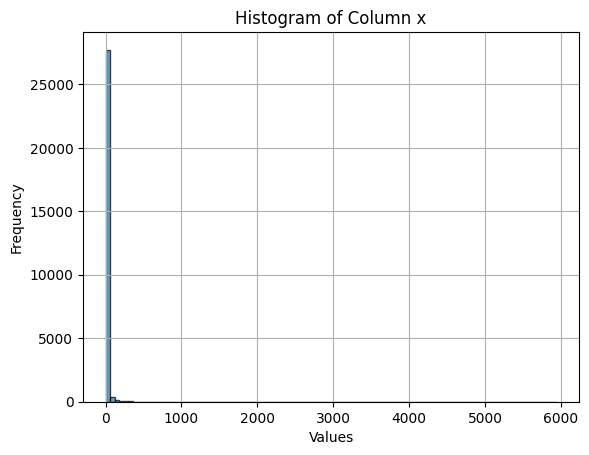

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
file_path = '/Users/gayathri/Library/CloudStorage/Box-Box/Local News Data/all_domain_data/merged_file.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Plotting the histogram for the column 'x'
plt.hist(data['gpe_sum'], bins=100, edgecolor='black', alpha=0.7)
plt.title('Histogram of Column x')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


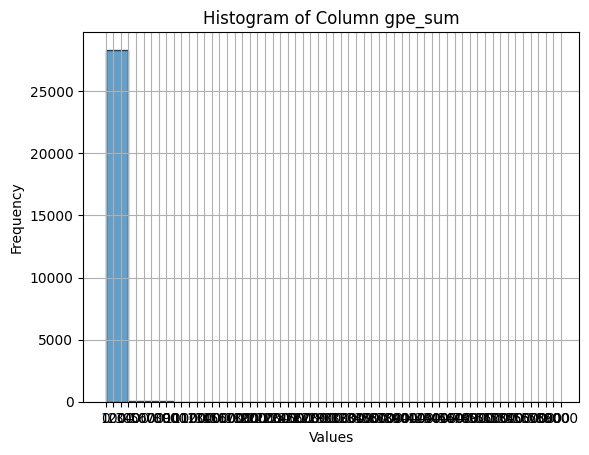

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
file_path = '/Users/gayathri/Library/CloudStorage/Box-Box/Local News Data/all_domain_data/merged_file.csv'  # Replace with your CSV file path
data = pd.read_csv(file_path)

# Plotting the histogram for the column 'x'
plt.hist(data['gpe_sum'], bins=20, edgecolor='black', alpha=0.7)

# Set the x-axis ticks
plt.xticks(range(0, max(data['gpe_sum']) + 100, 100))  # Adjust the range and step as needed

# Set the title and labels
plt.title('Histogram of Column gpe_sum')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show grid
plt.grid(True)

# Display the plot
plt.show()
